# House Prices: Advanced Regression Techniques
Playground for the [House Prices: Advanced Regression Techniques Kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Also my thoughts on how to tackle the problem.

Evaluation Metric: RMSE

## 1. Loading the libraries and data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data
train_df = pd.read_csv('./datasets/house_prices_train.csv')
test_df = pd.read_csv('./datasets/house_prices_test.csv') # for later use

In [3]:
# Displaying the head
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's see a scatter of the prices with respect of the lot area - simple, but just to get a feel for the data.

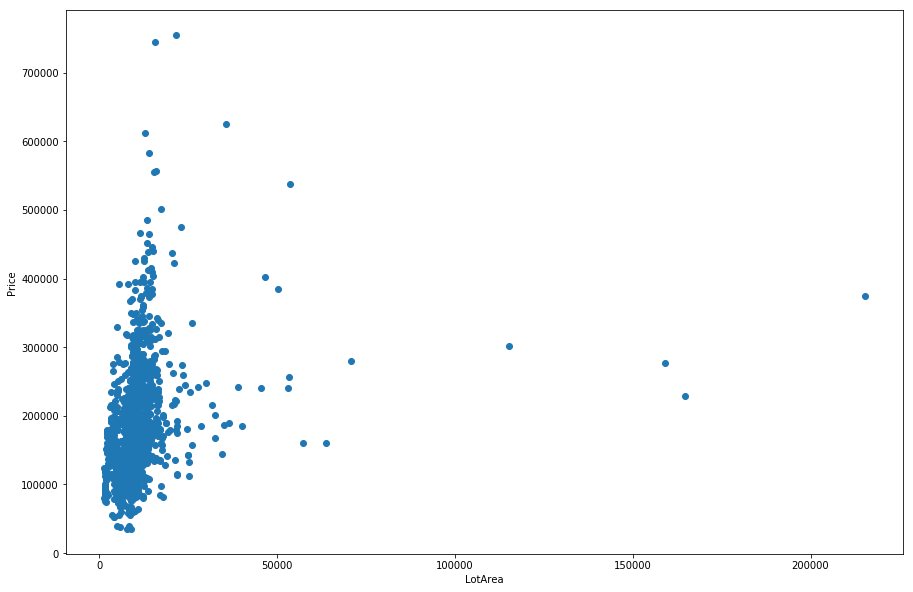

In [4]:
plt.subplots(figsize=(15,10))
plt.scatter(train_df['LotArea'].values, train_df['SalePrice'].values)
plt.xlabel('LotArea')
plt.ylabel('Price')
plt.show()

One would assume that there is a strong correlation between lotsize and price, but from the figure above it seems that this is not necessary the case.

Although some linear relationship does exist, there are various outliers.

## 2. EDA
Lots of things to do here. The basics revolve around a step process to do a number of things:
1. A basic summary of the data.
2. Check for missing data.
3. Gain insight into the data set by:  
    a. Univariate relations - check how each feature relates to the price.  
    b. Multivariate relations - check whether multiple features, as a group, have a relationship with the price.  
    c. Dimensionality reduction - Helps us understand the variance between features.  

### 2.1 A basic summary of the data.
With the help of pandas getting basic summary information about the data set can be quite easiy.

In [5]:
# getting the shape
train_df.shape

(1460, 81)

In [6]:
# Describe the dataset's only numerical columns
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train_df['Exterior1st'].head()

0    VinylSd
1    MetalSd
2    VinylSd
3    Wd Sdng
4    VinylSd
Name: Exterior1st, dtype: object

In [8]:
# Describes the variables of each category - whether its a int, float or an object. 
# If the variable is an object its safe to assume that it is a category of some kind.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### 2.2 Checking for missing data.
I enjoy the visual approach to checking for missing data - thus the `missingno` library.

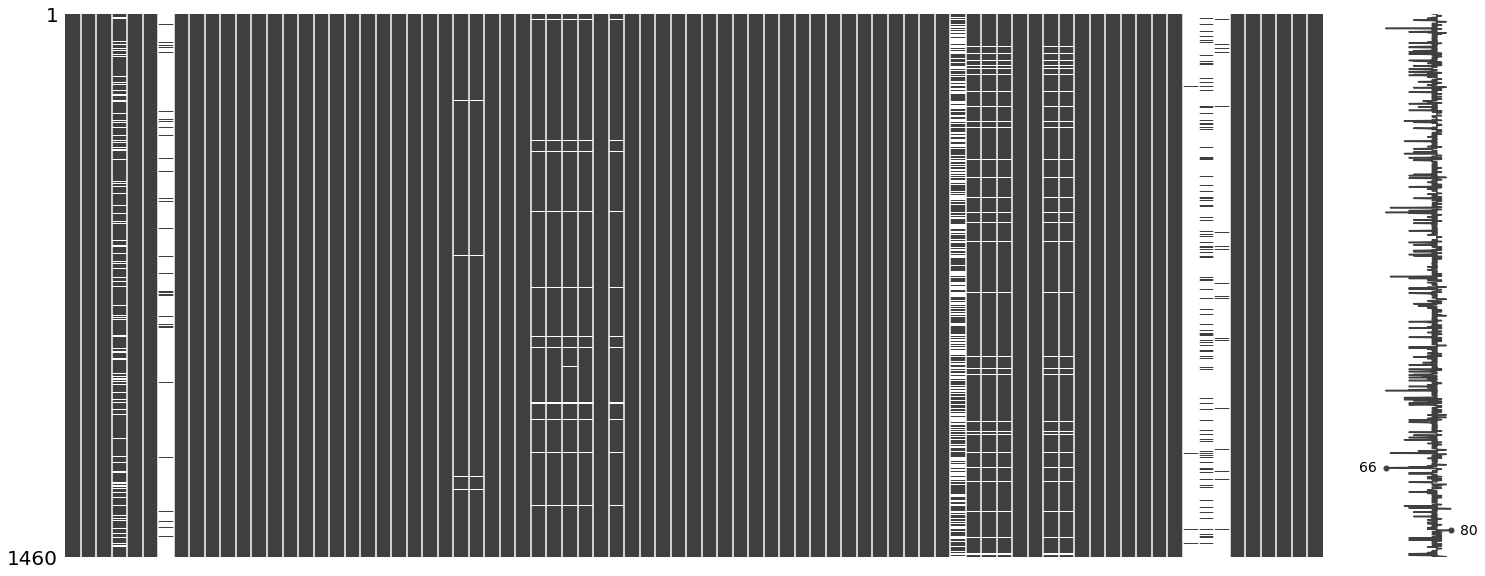

In [9]:
import missingno as msno
msno.matrix(train_df)

It seems the seventh column is completely gone, as well as the 7-through-9 counting from right to left. There is one column that has a lot of data missing as well. Let's get a more precise count.

In [10]:
# Getting the null values as counts
null_columns = train_df.columns[train_df.isnull().any()]
train_df[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
# Getting the null values as a percentage
train_df[null_columns].isnull().sum() / train_df.shape[0]*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

We see that the *Alley* column, the *FireplaceQu*, *PoolQC*, *Fence* and *MiscFeature* columns have the larges percent of missing values. I intend to drop them as from my limited (more like common sense) domain experience they do not appear to be valuable features.

In [13]:
train_df = train_df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence','MiscFeature'], axis=1)

Let's check again for the missing features to see what's left.

In [16]:
null_columns = train_df.columns[train_df.isnull().any()]
train_df[null_columns].isnull().sum() / train_df.shape[0]*100

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64